### Miara odległości od normy

In [215]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import plotly.express as px
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
import random
import plotly.graph_objs as go

In [216]:
df_prep = pd.read_csv("..\chapter3\gasometry_prepared_data.csv")
cols=["BETET",	"CO2TET", "O2TET", "IONH"]
my_blue="#0064B2";
my_red="#D61600";

In [217]:
df_prep

,Unnamed: 0,PACJENT_NR,BADANIE_NR,BETET,CO2TET,HCO3ACTE,HCO3STTE,O2SATTET,O2TET,IONH,ZGON
0,0,1,1,0.326087,2.21,0.850000,0.225,-2.48,-0.720,1.882698,0.0
1,1,1,2,0.086957,5.22,0.866667,0.200,0.86,4.880,3.297125,0.0
2,2,1,3,0.760870,3.10,1.250000,0.800,0.92,6.000,2.201643,0.0
3,3,1,4,0.869565,2.75,1.266667,0.675,0.62,1.440,1.882698,0.0
4,4,1,5,0.608696,2.61,1.083333,0.725,0.82,2.800,1.970160,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2929,2929,145,5,-0.717391,1.63,0.133333,-0.350,0.18,0.420,2.294287,1.0
2930,2930,145,6,-0.891304,1.39,-0.016667,-0.450,0.76,1.640,2.254399,1.0
2931,2931,145,7,-1.065217,1.71,-0.050000,-0.650,-0.06,0.316,2.708690,1.0
2932,2932,145,8,-0.695652,1.15,0.066667,-0.275,0.62,1.600,1.857967,1.0


In [218]:
df_dist=df_prep[["PACJENT_NR", "BADANIE_NR", "ZGON"]]

In [219]:
df_miernik=df_prep.copy()
vars1=["BETET", "O2TET", 'HCO3ACTE', 'HCO3STTE',  'O2SATTET']
vars2=["IONH", "CO2TET"]

#wyliczenie wartości poza normą świadczące o zakwaszeniu organizmu
df_miernik[["BETET_kw", "O2TET_kw", 'HCO3ACTE_kw', 'HCO3STTE_kw',  'O2SATTET_kw']]=df_miernik[vars1].applymap(lambda x: 0 if x >= 0 else abs(x))
df_miernik[["IONH_kw", "CO2TET_kw"]]=df_miernik[vars2].applymap(lambda x: 0 if x <= 1 else x-1)

#całe odchylenia
df_miernik[["BETET_pn", "O2TET_pn", 'HCO3ACTE_pn', 'HCO3STTE_pn',  'O2SATTET_pn']] = df_miernik[vars1].applymap(lambda x: 0 if (x >= 0) and (x <= 1) else (abs(x) if x < 0 else x - 1))
df_miernik[["IONH_pn", "CO2TET_pn"]] = df_miernik[vars2].applymap(lambda x: 0 if (x >= 0) and (x <= 1) else (abs(x) if x < 0 else x - 1))

# Oblicz pierwiastek z sumy kwadratów elementów z każdego wiersza
df_dist['euclidean_kw'] = np.sqrt((df_miernik[["BETET_kw", "O2TET_kw", "IONH_kw", "CO2TET_kw"]]**2).sum(axis=1))
df_dist['euclidean_kw_skum']=df_dist.groupby('PACJENT_NR')['euclidean_kw'].cumsum()

df_dist['euclidean_all'] = np.sqrt((df_miernik[["BETET_pn", "O2TET_pn", "IONH_pn", "CO2TET_pn"]]**2).sum(axis=1))
df_dist['euclidean_all_skum']=df_dist.groupby('PACJENT_NR')['euclidean_all'].cumsum()

C:\Users\dorot\AppData\Local\Temp\ipykernel_38724\3373286468.py:6: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

C:\Users\dorot\AppData\Local\Temp\ipykernel_38724\3373286468.py:7: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

C:\Users\dorot\AppData\Local\Temp\ipykernel_38724\3373286468.py:10: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

C:\Users\dorot\AppData\Local\Temp\ipykernel_38724\3373286468.py:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

C:\Users\dorot\AppData\Local\Temp\ipykernel_38724\3373286468.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\dorot\AppData\Local\Temp\ip

In [213]:
df_dist

,PACJENT_NR,BADANIE_NR,ZGON,euclidean_kw,euclidean_kw_skum,euclidean_all,euclidean_all_skum
0,1,1,0.0,1.661823,1.661823,1.661823,1.661823
1,1,2,0.0,4.804704,6.466527,6.175725,7.837548
2,1,3,0.0,2.419493,8.886020,5.554633,13.392181
3,1,4,0.0,1.960014,10.846034,2.008795,15.400976
4,1,5,0.0,1.879710,12.725744,2.602558,18.003534
...,...,...,...,...,...,...,...
2929,145,5,1.0,1.608331,6.170188,1.608331,6.433502
2930,145,6,1.0,1.587464,7.757652,1.711619,8.145122
2931,145,7,1.0,2.135044,9.892696,2.135044,10.280165
2932,145,8,1.0,1.114692,11.007388,1.265914,11.546080


In [214]:
# Podziel dane na dwie ramki danych
df_zgon_0 = df_dist[df_dist['ZGON'] == 0]
df_zgon_1 = df_dist[df_dist['ZGON'] == 1]

y='euclidean_all'

# fig0 = make_subplots(rows=1, cols=2, subplot_titles=['Zgon: nie', 'Zgon: tak'])
# Wykres dla ZGON=0
fig1 = px.line(df_zgon_0, x='BADANIE_NR', y=y, color='PACJENT_NR', 
              labels={'BADANIE_NR': 'BADANIE_NR', y: y, 'PACJENT_NR': 'Pacjent'}, width=800, height=800)
fig1.update_xaxes(title_text='Numer badania')
fig1.update_yaxes(title_text='Odległość od normy (Miernik 1)')
fig1.update_layout(showlegend=False)

# Wykres dla ZGON=1
fig2 = px.line(df_zgon_1, x='BADANIE_NR', y=y, color='PACJENT_NR', 
               labels={'BADANIE_NR': 'BADANIE_NR', y: y, 'PACJENT_NR': 'Pacjent'}, width=800, height=800)
fig2.update_xaxes(title_text='Numer badania')
fig2.update_yaxes(title_text='Odległość od normy (Miernik 1)')
fig2.update_layout(showlegend=False)

fig1.update_yaxes(range=[0, 15])
fig2.update_yaxes(range=[0, 15])


fig1.update_xaxes(range=[0, 65])
fig2.update_xaxes(range=[0, 65])

fig1.update_layout(
    xaxis=dict(
        tickfont=dict(size=18),
        title_font=dict(size=28),
    ),
    yaxis=dict(
        tickfont=dict(size=18),
        title_font=dict(size=28)
    )
)
fig2.update_layout(
    xaxis=dict(
        tickfont=dict(size=18),
        title_font=dict(size=28),
    ),
    yaxis=dict(
        tickfont=dict(size=18),
        title_font=dict(size=28)
    )
)
fig1.update_layout(template="plotly_white")
fig2.update_layout(template="plotly_white")

fig1.write_image("images4/"+"miernik1_pacjenci_wyleczeni"+ ".png", width=1000, height=800, scale=4, format="png")
fig2.write_image("images4/"+"miernik1_pacjenci_zmarli"+ ".png", width=1000, height=800, scale=4, format="png")
fig1.write_html("images4/miernik1_pacjenci_wyleczeni.html")
fig2.write_html("images4/miernik1_pacjenci_zmarli.html")

# Wyświetl oba wykresy
fig1.show()
fig2.show()

KeyboardInterrupt: 

In [ ]:
# Podziel dane na dwie ramki danych
df_zgon_0 = df_dist[df_dist['ZGON'] == 0]
df_zgon_1 = df_dist[df_dist['ZGON'] == 1]

y='euclidean_all_skum'

# fig0 = make_subplots(rows=1, cols=2, subplot_titles=['Zgon: nie', 'Zgon: tak'])
# Wykres dla ZGON=0
fig1 = px.line(df_zgon_0, x='BADANIE_NR', y=y, color='PACJENT_NR', 
              labels={'BADANIE_NR': 'BADANIE_NR', y: y, 'PACJENT_NR': 'Pacjent'}, width=800, height=800)
fig1.update_xaxes(title_text='Numer badania')
fig1.update_yaxes(title_text='Skumulowana odległość od normy (Miernik 1)')
fig1.update_layout(showlegend=False)

# Wykres dla ZGON=1
fig2 = px.line(df_zgon_1, x='BADANIE_NR', y=y, color='PACJENT_NR', 
               labels={'BADANIE_NR': 'BADANIE_NR', y: y, 'PACJENT_NR': 'Pacjent'}, width=800, height=800)
fig2.update_xaxes(title_text='Numer badania')
fig2.update_yaxes(title_text='Skumulowana odległość od normy (Miernik 1)')
fig2.update_layout(showlegend=False)

# fig1.update_yaxes(range=[0, 15])
# fig2.update_yaxes(range=[0, 15])


fig1.update_yaxes(range=[0, 120])
fig2.update_yaxes(range=[0, 120])

fig1.update_xaxes(range=[0, 65])
fig2.update_xaxes(range=[0, 65])

fig1.update_layout(
    xaxis=dict(
        tickfont=dict(size=18),
        title_font=dict(size=28),
    ),
    yaxis=dict(
        tickfont=dict(size=18),
        title_font=dict(size=28)
    )
)
fig2.update_layout(
    xaxis=dict(
        tickfont=dict(size=18),
        title_font=dict(size=28),
    ),
    yaxis=dict(
        tickfont=dict(size=18),
        title_font=dict(size=28)
    )
)
fig1.update_layout(template="plotly_white")
fig2.update_layout(template="plotly_white")

fig1.write_image("images4/"+"miernik1_skum_pacjenci_wyleczeni"+ ".png", width=1000, height=800, scale=4, format="png")
fig2.write_image("images4/"+"miernik1_skum_pacjenci_zmarli"+ ".png", width=1000, height=800, scale=4, format="png")
fig1.write_html("images4/miernik1_skum_pacjenci_wyleczeni.html")
fig2.write_html("images4/miernik1_skum_pacjenci_zmarli.html")

# Wyświetl oba wykresy
fig1.show()
fig2.show()

In [ ]:
# Podziel dane na dwie ramki danych
df_zgon_0 = df_dist[df_dist['ZGON'] == 0]
df_zgon_1 = df_dist[df_dist['ZGON'] == 1]

y='euclidean_kw'

# fig0 = make_subplots(rows=1, cols=2, subplot_titles=['Zgon: nie', 'Zgon: tak'])
# Wykres dla ZGON=0
fig1 = px.line(df_zgon_0, x='BADANIE_NR', y=y, color='PACJENT_NR', 
              labels={'BADANIE_NR': 'BADANIE_NR', y: y, 'PACJENT_NR': 'Pacjent'}, width=800, height=800)
fig1.update_xaxes(title_text='Numer badania')
fig1.update_yaxes(title_text='Odległość od normy (Miernik 2)')
fig1.update_layout(showlegend=False)

# Wykres dla ZGON=1
fig2 = px.line(df_zgon_1, x='BADANIE_NR', y=y, color='PACJENT_NR', 
               labels={'BADANIE_NR': 'BADANIE_NR', y: y, 'PACJENT_NR': 'Pacjent'}, width=800, height=800)
fig2.update_xaxes(title_text='Numer badania')
fig2.update_yaxes(title_text='Odległość od normy (Miernik 2)')
fig2.update_layout(showlegend=False)

fig1.update_yaxes(range=[0, 15])
fig2.update_yaxes(range=[0, 15])


fig1.update_xaxes(range=[0, 65])
fig2.update_xaxes(range=[0, 65])

fig1.update_layout(
    xaxis=dict(
        tickfont=dict(size=18),
        title_font=dict(size=28),
    ),
    yaxis=dict(
        tickfont=dict(size=18),
        title_font=dict(size=28)
    )
)
fig2.update_layout(
    xaxis=dict(
        tickfont=dict(size=18),
        title_font=dict(size=28),
    ),
    yaxis=dict(
        tickfont=dict(size=18),
        title_font=dict(size=28)
    )
)
fig1.update_layout(template="plotly_white")
fig2.update_layout(template="plotly_white")

fig1.write_image("images4/"+"miernik2_pacjenci_wyleczeni"+ ".png", width=1000, height=800, scale=4, format="png")
fig2.write_image("images4/"+"miernik2_pacjenci_zmarli"+ ".png", width=1000, height=800, scale=4, format="png")
fig1.write_html("images4/miernik2_pacjenci_wyleczeni.html")
fig2.write_html("images4/miernik2_pacjenci_zmarli.html")

# Wyświetl oba wykresy
fig1.show()
fig2.show()

In [ ]:
# Podziel dane na dwie ramki danych
df_zgon_0 = df_dist[df_dist['ZGON'] == 0]
df_zgon_1 = df_dist[df_dist['ZGON'] == 1]

y='euclidean_kw_skum'

# fig0 = make_subplots(rows=1, cols=2, subplot_titles=['Zgon: nie', 'Zgon: tak'])
# Wykres dla ZGON=0
fig1 = px.line(df_zgon_0, x='BADANIE_NR', y=y, color='PACJENT_NR', 
              labels={'BADANIE_NR': 'BADANIE_NR', y: y, 'PACJENT_NR': 'Pacjent'}, width=800, height=800)
fig1.update_xaxes(title_text='Numer badania')
fig1.update_yaxes(title_text='Skumulowana odległość od normy (Miernik 2)')
fig1.update_layout(showlegend=False)

# Wykres dla ZGON=1
fig2 = px.line(df_zgon_1, x='BADANIE_NR', y=y, color='PACJENT_NR', 
               labels={'BADANIE_NR': 'BADANIE_NR', y: y, 'PACJENT_NR': 'Pacjent'}, width=800, height=800)
fig2.update_xaxes(title_text='Numer badania')
fig2.update_yaxes(title_text='Skumulowana odległość od normy (Miernik 2)')
fig2.update_layout(showlegend=False)

# fig1.update_yaxes(range=[0, 15])
# fig2.update_yaxes(range=[0, 15])


fig1.update_yaxes(range=[0, 120])
fig2.update_yaxes(range=[0, 120])

fig1.update_xaxes(range=[0, 65])
fig2.update_xaxes(range=[0, 65])

fig1.update_layout(
    xaxis=dict(
        tickfont=dict(size=18),
        title_font=dict(size=28),
    ),
    yaxis=dict(
        tickfont=dict(size=18),
        title_font=dict(size=28)
    )
)
fig2.update_layout(
    xaxis=dict(
        tickfont=dict(size=18),
        title_font=dict(size=28),
    ),
    yaxis=dict(
        tickfont=dict(size=18),
        title_font=dict(size=28)
    )
)
fig1.update_layout(template="plotly_white")
fig2.update_layout(template="plotly_white")

fig1.write_image("images4/"+"miernik2_skum_pacjenci_wyleczeni"+ ".png", width=1000, height=800, scale=4, format="png")
fig2.write_image("images4/"+"miernik2_skum_pacjenci_zmarli"+ ".png", width=1000, height=800, scale=4, format="png")
fig1.write_html("images4/miernik2_skum_pacjenci_wyleczeni.html")
fig2.write_html("images4/miernik2_skum_pacjenci_zmarli.html")

# Wyświetl oba wykresy
fig1.show()
fig2.show()

In [ ]:
df_pom=df_dist[["euclidean_kw", "PACJENT_NR", "ZGON", "BADANIE_NR"]]
len(df_pom[df_pom["euclidean_kw"]>8]["PACJENT_NR"].unique())
len(df_pom[(df_pom["euclidean_kw"] > 6) & (df_pom["ZGON"] == 1)]["PACJENT_NR"].unique())
len(df_pom[(df_pom["BADANIE_NR"] > 6)  & (df_pom["euclidean_kw"] > 4) & (df_pom["ZGON"] == 1)]["PACJENT_NR"].unique())


23

In [ ]:
df_6_measurements = df_dist.groupby('PACJENT_NR').head(6)

# Funkcja do obliczania współczynnika kierunkowego prostej
def calculate_slope(x, y):
    slope, intercept = np.polyfit(x, y, 1)
    return slope

# Oblicz współczynnik kierunkowy prostej dla każdego pacjenta
slopes = df_6_measurements.groupby('PACJENT_NR').apply(lambda group: calculate_slope(group['BADANIE_NR'], group['euclidean_kw_skum']))

unique_zgon = df_dist[['PACJENT_NR', 'ZGON']].drop_duplicates().set_index('PACJENT_NR')

# Połącz slopes z unique_zgon
slopes_df = slopes.to_frame(name='slope').join(unique_zgon)

slopes_df=slopes_df.reset_index(drop=True)
slopes_df

C:\Users\dorot\AppData\Local\Temp\ipykernel_38724\3717843472.py:9: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



,slope,ZGON
0,2.371381,0.0
1,2.221157,0.0
2,0.984857,0.0
3,0.386707,0.0
4,0.946572,0.0
...,...,...
102,0.490350,0.0
103,0.731804,1.0
104,2.237266,0.0
105,3.551268,0.0


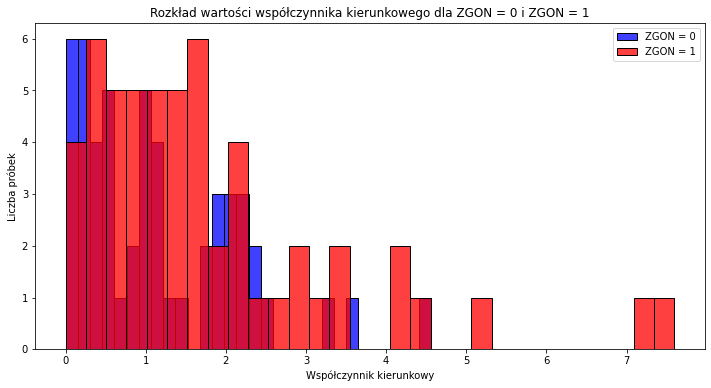

In [ ]:
plt.figure(figsize=(12, 6))

# Konwertowanie do numpy arrays
slope_zgon_0 = slopes_df[slopes_df['ZGON'] == 0]['slope'].to_numpy()
slope_zgon_1 = slopes_df[slopes_df['ZGON'] == 1]['slope'].to_numpy()

sns.histplot(slope_zgon_0, color='blue', label='ZGON = 0', bins=30)
sns.histplot(slope_zgon_1, color='red', label='ZGON = 1', bins=30)

plt.title('Rozkład wartości współczynnika kierunkowego dla ZGON = 0 i ZGON = 1')
plt.xlabel('Współczynnik kierunkowy')
plt.ylabel('Liczba próbek')
plt.legend()

In [ ]:
len(slopes_df[(slopes_df["slope"] > 4.6) & (slopes_df["ZGON"] == 1)])

# np.mean(slopes_df[(slopes_df["ZGON"] == 1)])


3

In [221]:
miernik2=df_dist[["euclidean_kw", "euclidean_kw_skum"]]
miernik2.shape

(2934, 2)

In [222]:
data_to_extract=pd.concat([df_miernik, miernik2], axis=1)

In [223]:
data_to_extract=data_to_extract.drop(columns="Unnamed: 0")

In [224]:
data_to_extract.to_csv("data_to_extraction.csv")

In [225]:
data_to_extract.columns

Index(['PACJENT_NR', 'BADANIE_NR', 'BETET', 'CO2TET', 'HCO3ACTE', 'HCO3STTE',
       'O2SATTET', 'O2TET', 'IONH', 'ZGON', 'BETET_kw', 'O2TET_kw',
       'HCO3ACTE_kw', 'HCO3STTE_kw', 'O2SATTET_kw', 'IONH_kw', 'CO2TET_kw',
       'BETET_pn', 'O2TET_pn', 'HCO3ACTE_pn', 'HCO3STTE_pn', 'O2SATTET_pn',
       'IONH_pn', 'CO2TET_pn', 'euclidean_kw', 'euclidean_kw_skum'],
      dtype='object')